# Job outcomes of students who graduated from college between 2010 and 2012

### Introduction

The original data on job outcomes that I will be using was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/) 

The data we will be using have the following columns:
- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

What we will do in this project is determine the job outcomes of graduates from college between 2010 and 2012. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('OneDrive/Documents/Python/Projects/Project 5/recent-grads.csv')
first_row = recent_grads.iloc[0]
print(first_row)

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.describe()
print(cleaned_data_count)

             Rank   Major_code          Total            Men          Women  \
count  172.000000   172.000000     172.000000     172.000000     172.000000   
mean    87.377907  3895.953488   39370.081395   16723.406977   22646.674419   
std     49.983181  1679.240095   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.750000  2403.750000    4549.750000    2177.500000    1778.250000   
50%     87.500000  3608.500000   15104.000000    5434.000000    8386.500000   
75%    130.250000  5503.250000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size      Employed      Full_time      Part_time  \
count  172.000000   172.000000     172.00000     172.000000     172.000000   
mean     0.522223   357.941860   31355.80814   26165.767442    8877.232558   
std      0.231205   619.680419   50777.42865   42957.1

### Exploring data

Now we will explore the data to answer 3 key questions:
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

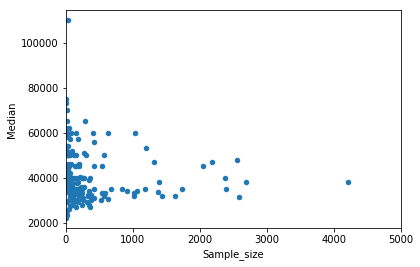

In [7]:
recent_grads.plot(x='Sample_size', y='Median', kind='Scatter', xlim=(0,5000))

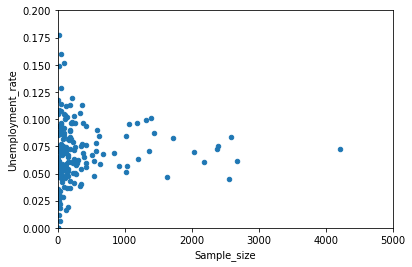

In [8]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='Scatter', xlim=(0,5000), ylim=(0,0.2))

There is no correlation between unemployment rate and sample size, however the smaller sample sizes have a higher range ranging from almost 0% to 20%. 

The unemployment rate displayed here is the fraction, so 0.05 x 100% = 5% if the unemployment rate if y axis displays 0.05.

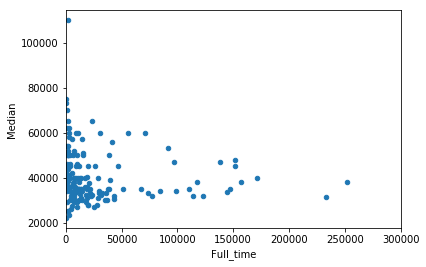

In [9]:
recent_grads.plot(x='Full_time', y='Median', kind='Scatter', xlim=(0,300000))

There is a weak negative correlation between median income and total full time employment, this might be evidence that the more popular a subject is the less money you'd earn. This could also be that the sample sizes which are lower such as close to 0 are inaccurate and are inflating and deflating the true median value of the graduates from that particular subject.  

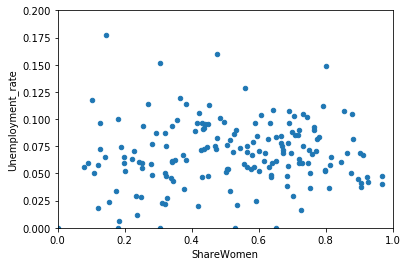

In [10]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='Scatter', xlim=(0,1), ylim=(0, 0.2))

The table here on the x axis displays the share of Women by a fraction, so 0.4 would be 0.4 x 100% = 40% is women. For the y axis, 0.05 x 100% = 5% unemployment rate. 

This shows there is a weak negative correlation between the share of women and unemployment rate, which means the greater number of women the lower the unemployment rate.

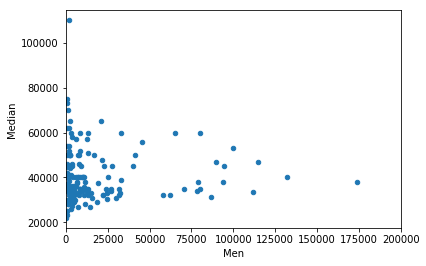

In [11]:
recent_grads.plot(x='Men', y='Median', kind='Scatter', xlim=(0,200000))

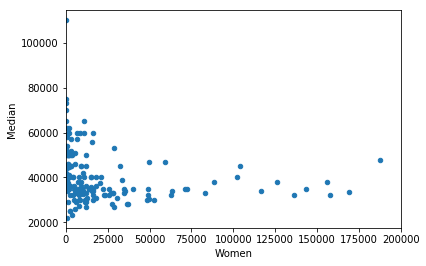

In [12]:
recent_grads.plot(x='Women', y='Median', kind='Scatter', xlim=(0,200000))

Men and women show little to no correlation between pay gap differences on median terms.

The overall analysis of the data is that the lower sample sizes, which could be mostly less popular subjects, have a big range in terms of income outcome but overall is higher than compared to higher sample size subjects. 

For women however, the highest sample size has a high median income outcome which could means some popular subjects could see women earning more which boosts the median income for the subjects, given that men median income stabilizes to a point as sample size increase, whereas when women sample size increase it doesn't stabilize as much and continues to float.

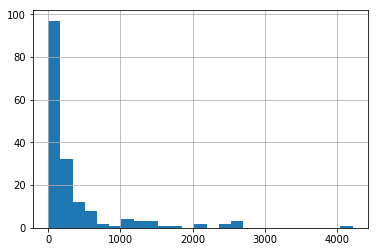

In [13]:
recent_grads['Sample_size'].hist(bins=25)

36000.0

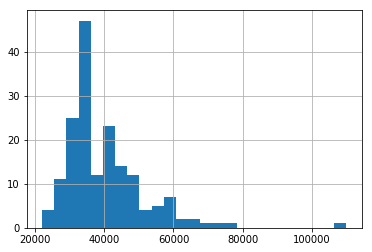

In [14]:
recent_grads['Median'].hist(bins=25)
recent_grads['Median'].median()

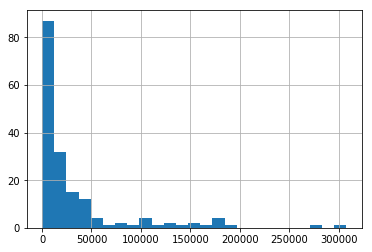

In [15]:
recent_grads['Employed'].hist(bins=25)

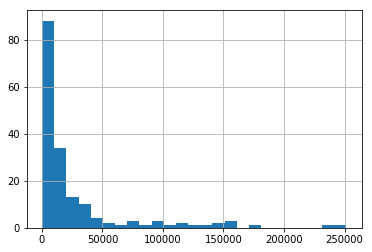

In [16]:
recent_grads['Full_time'].hist(bins=25)

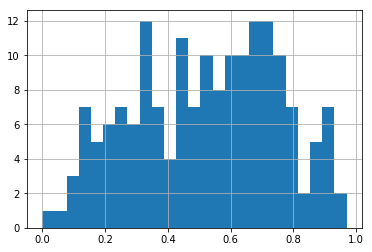

In [17]:
recent_grads['ShareWomen'].hist(bins=25)

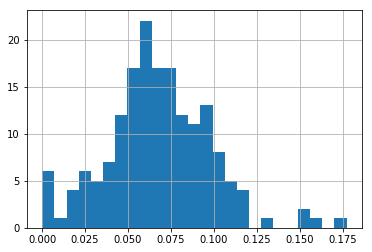

In [18]:
recent_grads['Unemployment_rate'].hist(bins=25)

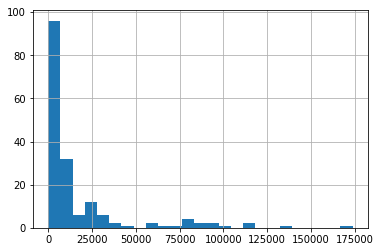

In [19]:
recent_grads['Men'].hist(bins=25)

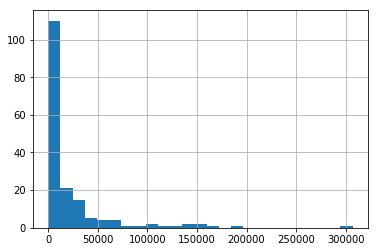

In [20]:
recent_grads['Women'].hist(bins=25)

The median salary after graduation is \$36,000 and looking on the share of women data 50%-80% is the most common range for the women share showing most majors are predominantly women. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBE0A66550>,
      dtype=object)

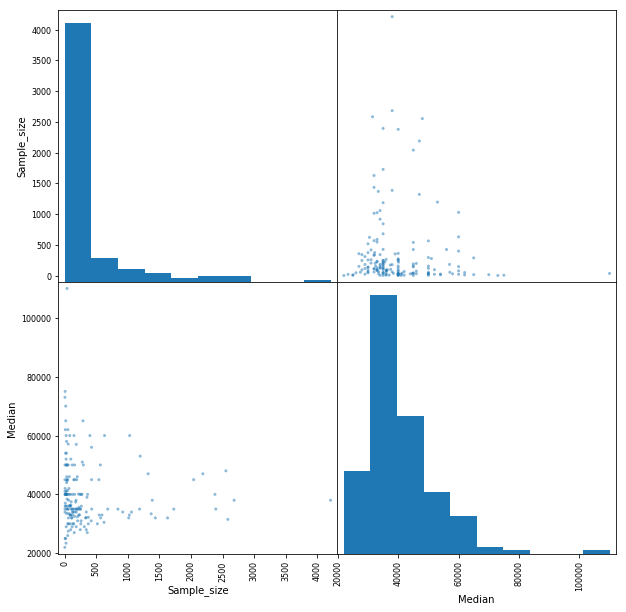

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBDF7014A8>,
      dtype=object)

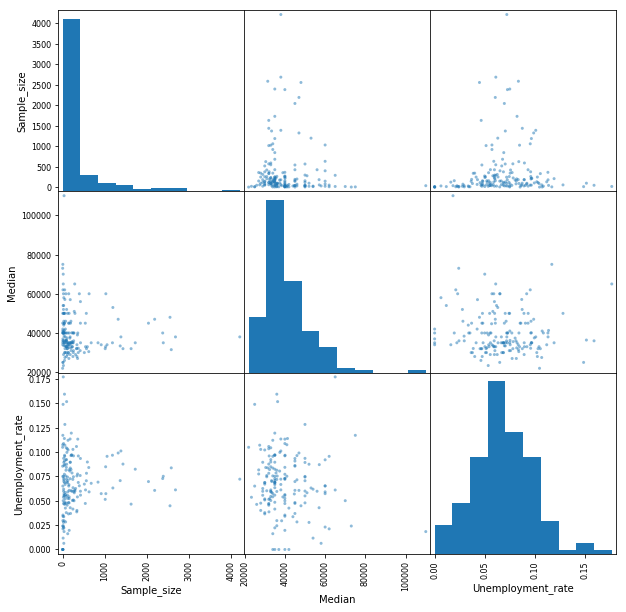

In [22]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))

In the graphs above, we see that there is no correlation between median income and unemployment rate as its all mostly within 20,000 to 50,000 dollars range while the unemployment rates vary a lot. We also see little to no correlations between any of the graphs before which were analyzed beforehand above. 

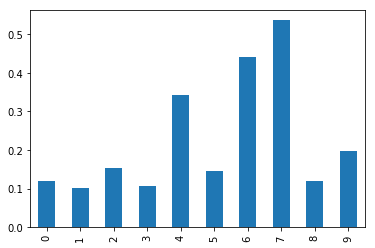

In [23]:
recent_grads['ShareWomen'][:10].plot(kind='bar')

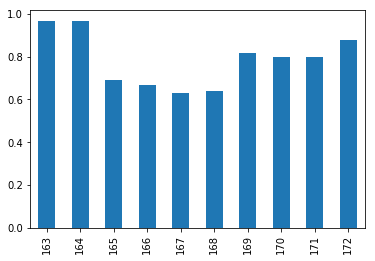

In [24]:
recent_grads['ShareWomen'][-10:].plot(kind='bar')

The share of women from first ten rows show there is little share of women except a few, compared to the last 10 rows it shows it is dominated by women with a few almost as high as 100% 

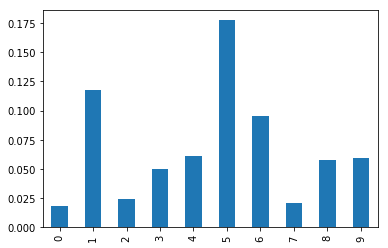

In [25]:
recent_grads['Unemployment_rate'][:10].plot(kind='bar')

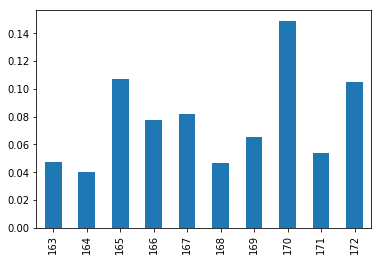

In [26]:
recent_grads['Unemployment_rate'][-10:].plot(kind='bar')

For the first 10 rows unemployment rate are generally lower than the last 10 rows, given the first 10 rows are more men dominated this could conclude that men decrease the unemployment rates where more women dominated majors have higher unemployment rates, this could also lead to lower earnings for women in the longer term from University.

### Conclusion

In conclusion, majors dominated by men are employed more than majors dominated by women which could lead to that men earn more than women given they are unemployed for a longer period of time which could dent their long term earning potentials as the men get jobs quicker. The reasons behind this could be complicated such as having children, caring for someone at home or other life problems.